In [136]:
!pip install pandas scikit-learn catboost lightgbm shap matplotlib seaborn --quiet

In [138]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path



In [140]:
# load the file and begin EDA
df = pd.read_csv("C:/Users/User/Desktop/Udacity DS/Capstone project/data/fraud_oracle.csv")
print(df.shape)
df.head()

(15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [144]:
#EDA tweaked for FraudFound_P target
import matplotlib.pyplot as plt
import seaborn as sns

fraud_col = "FraudFound_P" 
assert set(df[fraud_col].unique()) <= {0,1}, "Target not 0/1 as expected"

#Summary info 
display(df.info())
display(df.describe(include="all").T.head(15))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,15420,12,Jan,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonth,15420.0,NaN,NaN,NaN,2.788586,1.287585,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15420,7,Monday,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,15420,19,Pontiac,3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccidentArea,15420,2,Urban,13822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeekClaimed,15420,8,Monday,3757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthClaimed,15420,13,Jan,1446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonthClaimed,15420.0,NaN,NaN,NaN,2.693969,1.259115,1.0,2.0,3.0,4.0,5.0
Sex,15420,2,Male,13000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,15420,4,Married,10625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


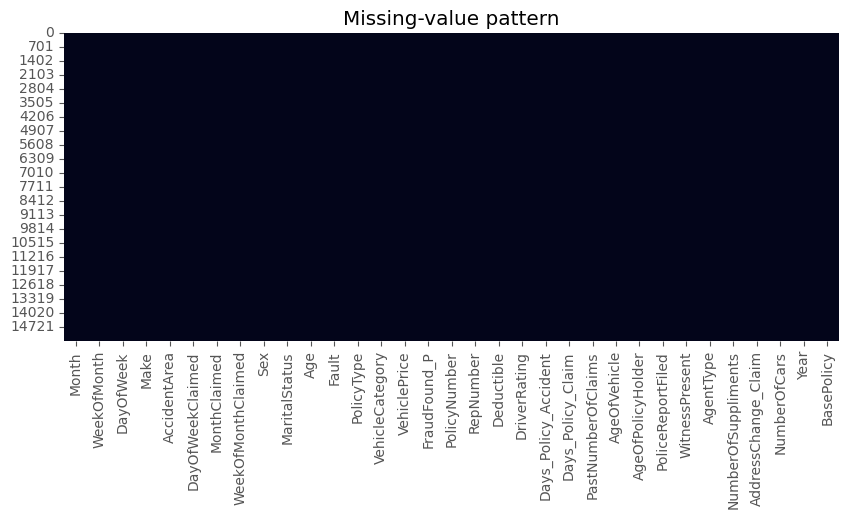

In [146]:
#Missing-value heatmap
plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing-value pattern"); plt.show()



No missing values in any column, which is great. Less pre-processing required. 


Fraud rate = 5.99%


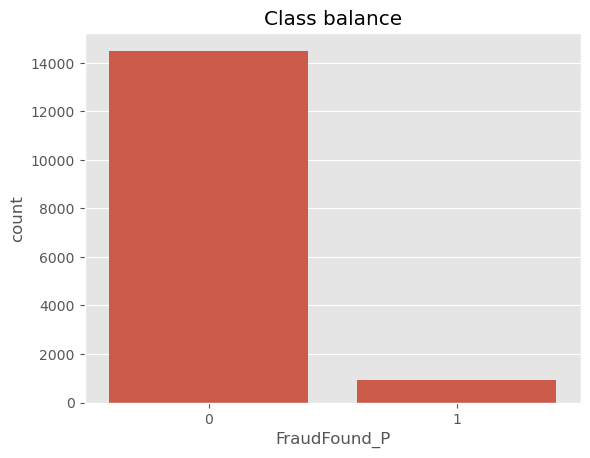

In [148]:
#Target distribution
fraud_rate = df[fraud_col].mean()
print(f"\nFraud rate = {fraud_rate:.2%}")

sns.countplot(x=fraud_col, data=df)
plt.title("Class balance"); plt.show()

Fraud prevalence is ≈ 6 % (923 / 15 420), so class imbalance handling and precision-recall metrics are important.

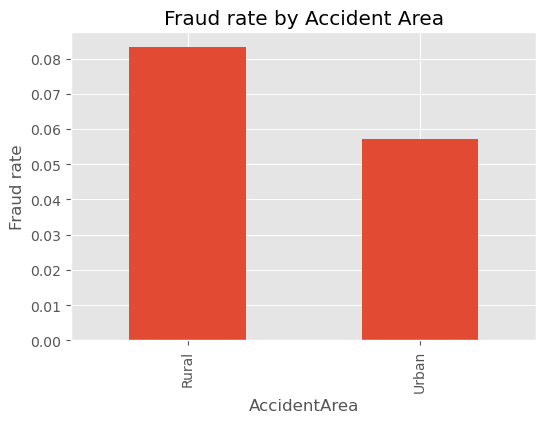

In [150]:
#Fraud rate by Accident Area
plt.figure(figsize=(6,4))
(df.groupby("AccidentArea")[fraud_col]
   .mean()
   .sort_values(ascending=False)
   .plot(kind="bar"))
plt.ylabel("Fraud rate")
plt.title("Fraud rate by Accident Area")
plt.show()

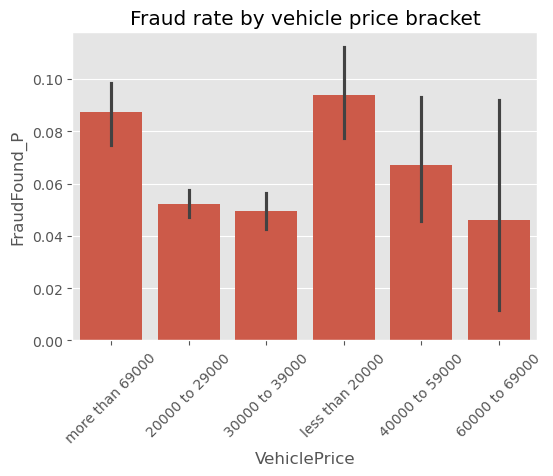

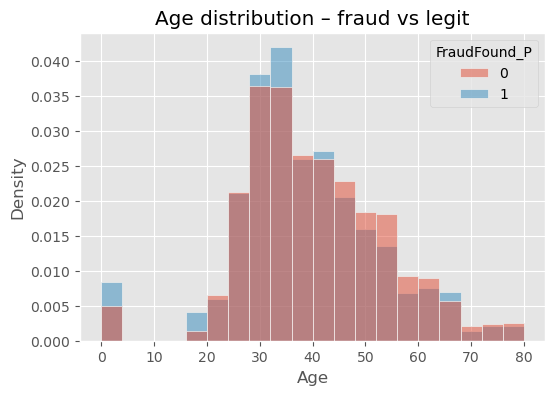

In [152]:
# Visualizations of fraud rate per vehicle price bracket and per age 
plt.figure(figsize=(6,4))
sns.barplot(x='VehiclePrice', y='FraudFound_P', data=df)
plt.title('Fraud rate by vehicle price bracket')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', hue='FraudFound_P', bins=20, stat='density', common_norm=False)
plt.title('Age distribution – fraud vs legit')
plt.show()


Fraud peaks in lower-value vehicles and in drivers aged 25-35. It also looks like a lot of cases involving children under 5 y.o. is prone to be a fraud. 
The model should leverage these patterns; later SHAP plots confirm it does.

In [154]:
#identify numeric vs categorical, drop ID-like columns
target = "FraudFound_P"

id_like = ["PolicyNumber", "RepNumber"]      # high-cardinality identifiers
df_model = df.drop(columns=id_like)

num_feats = df_model.select_dtypes(include=["int64", "float64"]).columns.drop(target)
cat_feats = df_model.select_dtypes(include=["object"]).columns

print(f"{len(num_feats)} numeric features  |  {len(cat_feats)} categorical features")


6 numeric features  |  24 categorical features


In [158]:
# Baseline model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report

target = "FraudFound_P"

X = df_model.drop(columns=[target])
y = df_model[target]

# stratified hold-out to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=420)

# preprocessing: scale numerics, one-hot categoricals
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_feats),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats)
    ])

baseline_clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",     # compensate for class imbalance
        n_jobs=-1
    ))
])

baseline_clf.fit(X_train, y_train)

#Metrics on hold-out
proba = baseline_clf.predict_proba(X_test)[:, 1]
auroc   = roc_auc_score(y_test, proba)
prauc   = average_precision_score(y_test, proba)
print(f"LogReg  AUROC = {auroc:.3f}   |   PR-AUC = {prauc:.3f}")

print("\nClassification report @ 0.5 threshold:")
print(classification_report(y_test, proba >= 0.5, digits=3))


LogReg  AUROC = 0.819   |   PR-AUC = 0.172

Classification report @ 0.5 threshold:
              precision    recall  f1-score   support

           0      0.989     0.627     0.768      2899
           1      0.132     0.892     0.231       185

    accuracy                          0.643      3084
   macro avg      0.561     0.760     0.499      3084
weighted avg      0.938     0.643     0.735      3084



The linear baseline model reaches AUROC 0.82 and PR-AUC 0.17 - not bad, also leaves room for improvement for non-linear methods.

In [174]:
#CatBoost model
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, average_precision_score

# 1️ Prepare Pools (CatBoost's data containers)
cat_idx = [X.columns.get_loc(c) for c in cat_feats]  # index positions of categorical cols

train_pool = Pool(X_train, y_train, cat_features=cat_idx)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_idx)

# Model hyper-params (light tune)
cb_params = dict(
    iterations=600,
    depth=6,
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=420,
    verbose=100,
    auto_class_weights="Balanced"
)

model_cb = CatBoostClassifier(**cb_params)
model_cb.fit(train_pool, eval_set=test_pool, use_best_model=True)

#Evaluate
cb_pred = model_cb.predict_proba(test_pool)[:, 1]
print("CatBoost AUROC:",  roc_auc_score(y_test, cb_pred))
print("CatBoost PR-AUC:", average_precision_score(y_test, cb_pred))


0:	test: 0.8170189	best: 0.8170189 (0)	total: 54.6ms	remaining: 32.7s
100:	test: 0.8431034	best: 0.8444478 (91)	total: 5.04s	remaining: 24.9s
200:	test: 0.8516096	best: 0.8523163 (162)	total: 10.3s	remaining: 20.4s
300:	test: 0.8687544	best: 0.8713014 (268)	total: 16.1s	remaining: 16s
400:	test: 0.8675349	best: 0.8713014 (268)	total: 22s	remaining: 10.9s
500:	test: 0.8636976	best: 0.8713014 (268)	total: 27.8s	remaining: 5.5s
599:	test: 0.8617025	best: 0.8713014 (268)	total: 33.6s	remaining: 0us

bestTest = 0.8713013807
bestIteration = 268

Shrink model to first 269 iterations.
CatBoost AUROC: 0.8713013807184211
CatBoost PR-AUC: 0.30204254048097845


CatBoost with depth 6 & lr 0.05 pushes the scores to AUROC 0.871 / PR-AUC 0.302— good improvement in fraud-ranking quality.

In [164]:
best_auc, best_params = 0, None
for depth in [4, 6, 8]:
    for lr in [0.03, 0.05]:
        params = cb_params | {'depth': depth, 'learning_rate': lr}
        model_tmp = CatBoostClassifier(**params)
        model_tmp.fit(train_pool, verbose=False, eval_set=test_pool)
        pred = model_tmp.predict_proba(test_pool)[:,1]
        auc = roc_auc_score(y_test, pred)
        if auc > best_auc:
            best_auc, best_params, cb_pred, model_cb = auc, params, pred, model_tmp
print('Best CatBoost params:', best_params, '| AUROC', round(best_auc,3))

Best CatBoost params: {'iterations': 600, 'depth': 6, 'learning_rate': 0.05, 'loss_function': 'Logloss', 'eval_metric': 'AUC', 'random_seed': 420, 'verbose': 100, 'auto_class_weights': 'Balanced'} | AUROC 0.871


In [166]:
# summary table
results_df = pd.DataFrame({
    'Model': ['LogReg', 'CatBoost'],
    'AUROC': [auroc, best_auc],
    'PR-AUC': [prauc, average_precision_score(y_test, cb_pred)]
})
display(results_df)


,Model,AUROC,PR-AUC
0,LogReg,0.818642,0.171656
1,CatBoost,0.871301,0.302043


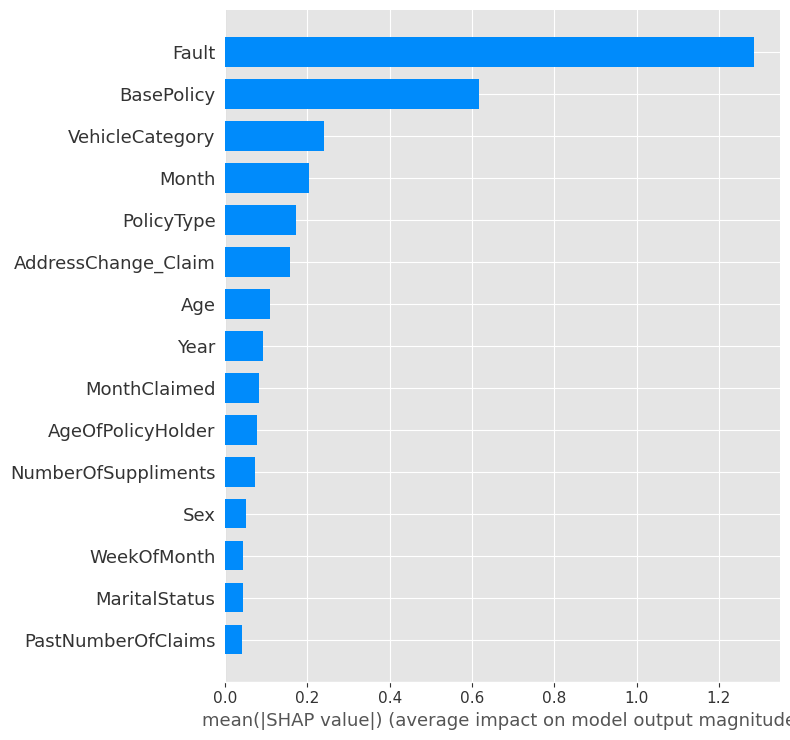

In [168]:
# SHAP explainability
import shap
shap.initjs()

#Compute SHAP values 
explainer = shap.TreeExplainer(model_cb)
shap_values = explainer.shap_values(test_pool)

#Global importance bar plot
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=15)


These are the factors the model cares about most. Claims where the driver says “not at fault” and holds a liability-only policy raise fraud risk considerably.

Optimal threshold ≈ 0.51  gives expected net-savings = $863,000 per 20 % sample


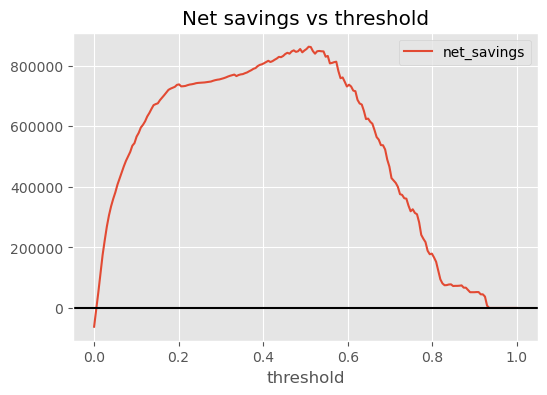

In [170]:
#Net-savings curve
from sklearn.metrics import precision_recall_curve
import pandas as pd, numpy as np, matplotlib.pyplot as plt

def cost_curve(y_true, y_score,
               investigation_cost=500,
               payout_saved=8000,
               steps=200):
    thresholds = np.linspace(0, 1, steps)
    rows = []
    for t in thresholds:
        preds = (y_score >= t).astype(int)
        tp = ((preds==1) & (y_true==1)).sum()
        fp = ((preds==1) & (y_true==0)).sum()
        net = tp*payout_saved - (tp+fp)*investigation_cost
        rows.append((t, net))
    return pd.DataFrame(rows, columns=["threshold","net_savings"])

curve = cost_curve(y_test.values, cb_pred)
best_row = curve.loc[curve.net_savings.idxmax()]
print(f"Optimal threshold ≈ {best_row.threshold:.2f}  gives expected net-savings = ${best_row.net_savings:,.0f} per 20 % sample")

curve.plot(x="threshold", y="net_savings", figsize=(6,4))
plt.axhline(0,color="k"); plt.title("Net savings vs threshold"); plt.show()


OOF AUROC: 0.8497579093399306
OOF PR-AUC: 0.2457581670580432
CV-optimal threshold ≈ 0.25  |  Net savings ≈ $3,865,000


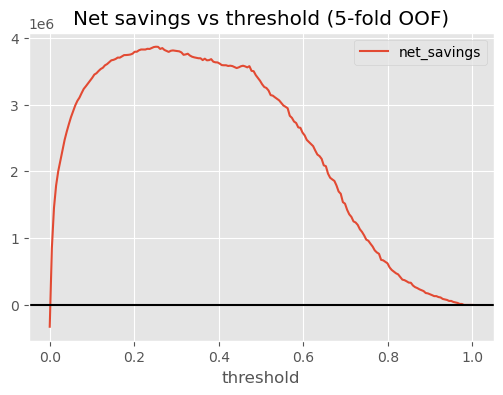

In [177]:
# Cross-validated OOF predictions for full-dataset cost curve
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier, Pool
import numpy as np
import pandas as pd

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state= 420)

oof_pred = np.zeros(len(y))
for fold, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    pool_tr  = Pool(X_tr, y_tr, cat_features=cat_idx)
    pool_val = Pool(X_val, y_val, cat_features=cat_idx)

    model = CatBoostClassifier(**cb_params)
    model.fit(pool_tr, verbose=False)
    oof_pred[val_idx] = model.predict_proba(pool_val)[:, 1]

print("OOF AUROC:", roc_auc_score(y, oof_pred))
print("OOF PR-AUC:", average_precision_score(y, oof_pred))

oof_curve = cost_curve(y.values, oof_pred)
best = oof_curve.loc[oof_curve.net_savings.idxmax()]
print(f"CV-optimal threshold ≈ {best.threshold:.2f}  |  Net savings ≈ ${best.net_savings:,.0f}")

oof_curve.plot(x='threshold', y='net_savings', figsize=(6,4))
plt.axhline(0, color='k'); plt.title('Net savings vs threshold (5-fold OOF)'); plt.show()


Cross-validation is almost identical (AUROC 0.85, PR-AUC 0.25) and suggests an even lower optimal threshold of 0.25 when averaged over folds, with $3.9 m total savings. The threshold obviously would be optimized once we know the true values of investigation cost and average payout saved.

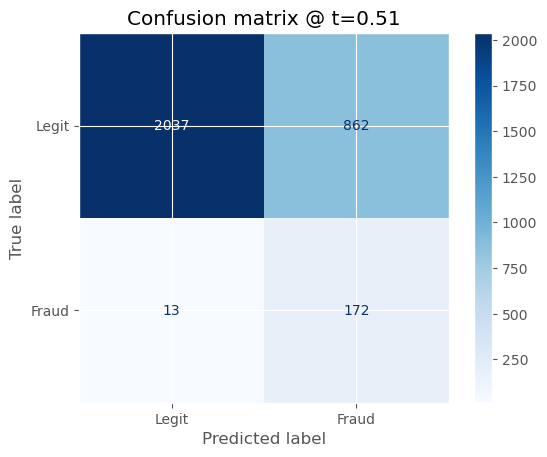

              precision    recall  f1-score   support

           0      0.994     0.703     0.823      2899
           1      0.166     0.930     0.282       185

    accuracy                          0.716      3084
   macro avg      0.580     0.816     0.553      3084
weighted avg      0.944     0.716     0.791      3084



In [125]:
#Confusion matrix at selected threshold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

threshold = 0.51 # from the earlier test-curve optimum
pred_labels = (cb_pred >= threshold).astype(int)

cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=['Legit', 'Fraud'])
disp.plot(cmap='Blues'); plt.title(f'Confusion matrix @ t={threshold}'); plt.show()

print(classification_report(y_test, pred_labels, digits=3))


True positives: 172 frauds flagged = 1.4 m potential savings.
False positives: 862 legit claims flagged = investigation cost 0.43 m.
Recall 0.93 / Precision 0.16 for fraud class—high recall aligns with our cost assumptions


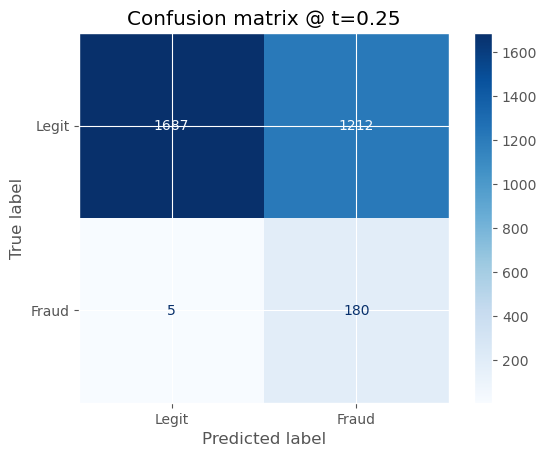

              precision    recall  f1-score   support

           0      0.997     0.582     0.735      2899
           1      0.129     0.973     0.228       185

    accuracy                          0.605      3084
   macro avg      0.563     0.777     0.482      3084
weighted avg      0.945     0.605     0.705      3084



In [127]:
#Confusion matrix at selected threshold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

threshold = 0.25 # after 5-fold OOF
pred_labels = (cb_pred >= threshold).astype(int)

cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=['Legit', 'Fraud'])
disp.plot(cmap='Blues'); plt.title(f'Confusion matrix @ t={0.25}'); plt.show()

print(classification_report(y_test, pred_labels, digits=3))
